<a href="https://colab.research.google.com/github/sanajana9050/Microfashion-Trend-Analysis/blob/main/Microfashion_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing necessary libraries**#
##Mounting drive and fetching Reddit API##



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.7 MB/s eta 0:00:00


#**Scraping Reddit Comments from Subreddit**#

In [8]:
!pip install openpyxl  # Install openpyxl for working with Excel files

import praw
import pandas as pd

reddit = praw.Reddit(client_id='v8lmJTQnJUeaIobdevrxQA',
                     client_secret='ov2Vo_egu0VkJMkZGnqpJPwE07Yd9w',
                     user_agent='script by u/Just-Improvement-880')

subreddit = reddit.subreddit('streetwear')

comments = []
for submission in subreddit.top(limit=10):
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        comments.append(comment.body)

# Create DataFrame from the comments
df = pd.DataFrame(comments, columns=['Comment'])

# Remove duplicates and empty comments
df.drop_duplicates(inplace=True)
df = df[df['Comment'].str.strip().astype(bool)]

# Save DataFrame to Excel file
df.to_excel('reddit_comments.xlsx', index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [10]:
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments.xlsx'

# Save DataFrame to Excel file
df.to_excel(file_path, index=False)

#**Connecting SQL Database**#

In [24]:
!pip install mysql-connector-python

In [25]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-lite23
  liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils mysql-client-8.0 mysql-client-core-8.0
  mysql-server-8.0 mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-l

In [26]:
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [27]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

In [28]:
import mysql.connector

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')

# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

In [34]:
import mysql.connector
import pandas as pd

# Read data from Excel into DataFrame
df = pd.read_excel('reddit_comments.xlsx')

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')

# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

# Create the database if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS reddit_data")

# Switch to the database
cursor.execute("USE reddit_data")

# Create a table to store comments in MySQL
create_table_query = '''
CREATE TABLE IF NOT EXISTS reddit_comments (
    id INT AUTO_INCREMENT PRIMARY KEY,
    comment TEXT
)
'''
cursor.execute(create_table_query)

# Insert comments into MySQL table using parameterized query
insert_query = "INSERT INTO reddit_comments (comment) VALUES (%s)"
for index, row in df.iterrows():
    comment = row['Comment']
    cursor.execute(insert_query, (comment,))

# Commit changes and close connection
conn.commit()
conn.close()



#**Data Cleaning**#

In [44]:
from google.colab import drive
drive.mount('/content/drive')
import praw
import pandas as pd
import re

reddit = praw.Reddit(client_id='v8lmJTQnJUeaIobdevrxQA',
                     client_secret='ov2Vo_egu0VkJMkZGnqpJPwE07Yd9w',
                     user_agent='script by u/Just-Improvement-880')

subreddit = reddit.subreddit('streetwear')

comments = []
for submission in subreddit.top(limit=10):
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        comments.append(comment.body)

# Create DataFrame from the comments
df = pd.DataFrame(comments, columns=['Comment'])

# Remove duplicates and empty comments
df.drop_duplicates(inplace=True)
df = df[df['Comment'].str.strip().astype(bool)]

# Save DataFrame to Excel file
df.to_excel('reddit_comments.xlsx', index=False)


# Read data from Excel into DataFrame
# Replace 'reddit_comments.xls' with the filename of your Excel file
df = pd.read_excel('reddit_comments.xlsx')

# Sample comments from the 'reddit_comments' DataFrame
comments = df['Comment']

# Define regular expressions patterns for age and location extraction
age_pattern = r'\b(?:age|old|yo|years? old|turning)\s*(\d{1,2})\b'
location_pattern = r'\b(?:location|hometown|reside|live in|from)\s*[:,]?\s*(\b[A-Z][a-z]*(?:\s+[A-Z][a-z]*)*(?:,\s+[A-Z]{2})?)\b'

# Extract age and location information from comments
age_matches = [re.findall(age_pattern, str(comment), re.IGNORECASE) for comment in comments]
location_matches = [re.findall(location_pattern, str(comment), re.IGNORECASE) for comment in comments]

# Flatten lists of matches
age_info = [int(age) for sublist in age_matches for age in sublist if age.isdigit()]
location_info = [location for sublist in location_matches for location in sublist]

# Print extracted age and location information
print("Extracted Age Information:", age_info)
print("Extracted Location Information:", location_info)

file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments.xlsx'

# Save DataFrame to Excel file
df.to_excel(file_path, index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Extracted Age Information: [25, 60]
Extracted Location Information: ['now on', 'another place on reddit', 'an anatomical standpoint shouldn', 'a local store', 'wearing skirts', 'wearing pretty much anything except skirts and pants', 'charity shops because money', 'back home complimented me on my guts for wearing such a sweater', 'Pink', 'a girl', 'gap', 'them and they are phenomenal', 'wearing kilts', 'Bob', 'a hot country but from Norway', 'the men', 'the women section i always just imagine i', 'just above, to', 'home', 'my experience they don', 'the comments no Scots will be mad at me', 'utilikilts', 'uniqlo and bonobos to have no issue with that', 'you being yourself, it', 'my car', 'wearing any color', 'thrift stores', 'living true to yourself', 'itching', 'Shia LaBeouf', 'his hometown', 'Frank', 'an adult wearing a', 'Punch Drunk love in the photo', 'like', 'my local Kmart', 'Walmart and look fine', 'his yearbook has be posted on reddit a BUNCH', 'previous decades', 'a story someo

#**Extracting Age and Location from the comments**#

In [50]:
from google.colab import drive
import praw
import pandas as pd
import re

# Mount Google Drive
drive.mount('/content/drive')

# Initialize Reddit instance
reddit = praw.Reddit(client_id='v8lmJTQnJUeaIobdevrxQA',
                     client_secret='ov2Vo_egu0VkJMkZGnqpJPwE07Yd9w',
                     user_agent='script by u/Just-Improvement-880')

# Access subreddit and fetch comments
subreddit = reddit.subreddit('streetwear')
comments = []
for submission in subreddit.top(limit=10):
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        comments.append(comment.body)

# Create DataFrame from the comments
df = pd.DataFrame(comments, columns=['Comment'])

# Extract age and location information from comments
age_pattern = r'\b(?:age|old|yo|years? old|turning)\s*(\d{1,2})\b'
location_pattern = r'\b(?:location|hometown|reside|live in|from)\s*[:,]?\s*(\b[A-Z][a-z]*(?:\s+[A-Z][a-z]*)*(?:,\s+[A-Z]{2})?)\b'

df['Age'] = df['Comment'].str.extract(age_pattern, flags=re.IGNORECASE)
df['Location'] = df['Comment'].str.extract(location_pattern, flags=re.IGNORECASE)

# Save DataFrame to Excel file
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments_with_age_location.xlsx'
df.to_excel(file_path, index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [51]:
from google.colab import drive
import praw
import pandas as pd
import re

# Mount Google Drive
drive.mount('/content/drive')

# Initialize Reddit instance
reddit = praw.Reddit(client_id='v8lmJTQnJUeaIobdevrxQA',
                     client_secret='ov2Vo_egu0VkJMkZGnqpJPwE07Yd9w',
                     user_agent='script by u/Just-Improvement-880')

# Access subreddit and fetch comments
subreddit = reddit.subreddit('streetwear')
comments = []
for submission in subreddit.top(limit=10):
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        comments.append(comment.body)

# Create DataFrame from the comments
df = pd.DataFrame(comments, columns=['Comment'])

# Extract age and location information from comments
age_pattern = r'\b(?:age|old|yo|years? old|turning)\s*(\d{1,2})\b'
location_pattern = r'\b(?:location|hometown|reside|live in|from)\s*[:,]?\s*(\b[A-Z][a-z]*(?:\s+[A-Z][a-z]*)*(?:,\s+[A-Z]{2})?)\b'

df['Age'] = df['Comment'].str.extract(age_pattern, flags=re.IGNORECASE)
df['Location'] = df['Comment'].str.extract(location_pattern, flags=re.IGNORECASE)

# Save DataFrame to Excel file
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments_with_age_location.xlsx'
df.to_excel(file_path, index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

#**Age Distribution of Reddit Users on the subreddit**#

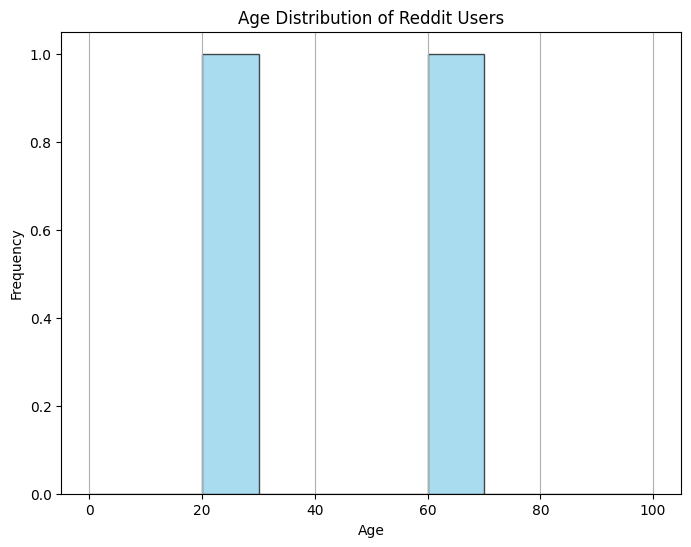

In [74]:
import matplotlib.pyplot as plt

# Read the updated Excel file with age and location information
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments_with_age_location.xlsx'
df = pd.read_excel(file_path)

# Data Visualization
# Plot histogram for age distribution
plt.figure(figsize=(8, 6))
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert 'Age' column to numeric
df['Age'].dropna().astype(int).hist(bins=range(0, 101, 10), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Reddit Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()




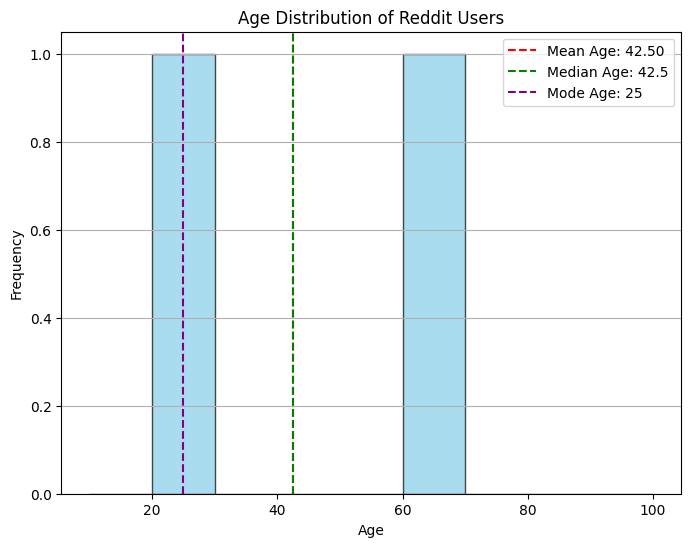

In [60]:
import matplotlib.pyplot as plt

# Read the updated Excel file with age and location information
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments_with_age_location.xlsx'
df = pd.read_excel(file_path)

# Data Analysis
# Calculate summary statistics for age demographics
mean_age = cleaned_data['Age'].mean()
median_age = cleaned_data['Age'].median()
mode_age = cleaned_data['Age'].mode().iloc[0]

# Determine the frequency distribution of age groups
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_distribution = cleaned_data['Age'].groupby(pd.cut(cleaned_data['Age'], age_bins)).count()

# Analyze location demographics
top_locations = cleaned_data['Location'].value_counts().head(10)

# Data Visualization
# Plot histogram for age distribution
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data['Age'], bins=age_bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Reddit Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median Age: {median_age}')
plt.axvline(mode_age, color='purple', linestyle='--', label=f'Mode Age: {mode_age}')
plt.legend()
plt.show()



#**Microfashion Trend Analysis**#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


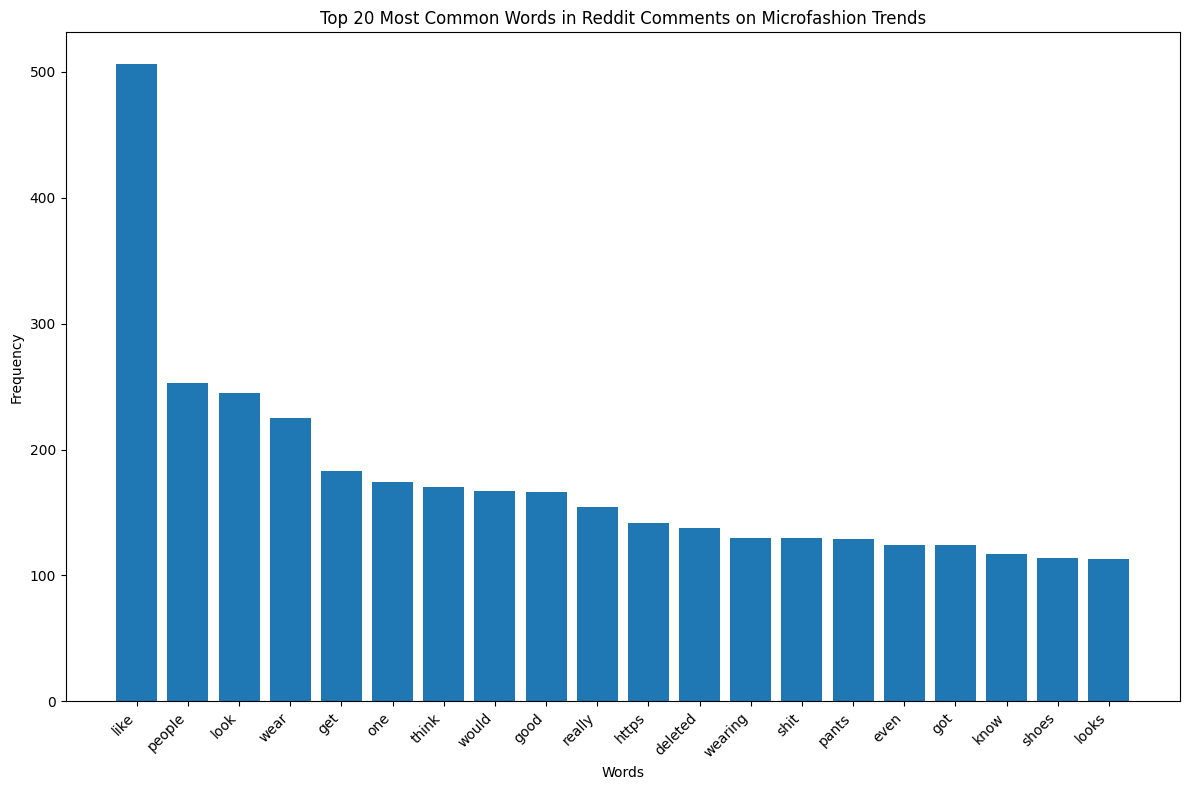

In [75]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Read the updated Excel file with age and location information
file_path = '/content/drive/MyDrive/microfashion trend analysis through reddit/reddit_comments_with_age_location.xlsx'
df = pd.read_excel(file_path)

# Tokenize words and remove stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Join all comments into a single string
all_comments = ' '.join(df['Comment'])

# Tokenize the combined comments
tokens = [word.lower() for word in word_tokenize(all_comments) if word.isalpha() and word.lower() not in stop_words]

# Count word frequencies
word_freq = Counter(tokens)

# Get the most common words
top_words = word_freq.most_common(20)

# Plotting the top words
plt.figure(figsize=(12, 8))
plt.bar(*zip(*top_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Reddit Comments on Microfashion Trends')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
